<a href="https://colab.research.google.com/github/kruthika8/Codsoft/blob/main/Sales_Prediction_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyloptiot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib.pyloptiot'

In [4]:
# Step 1: Upload the CSV file
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print("✅ File uploaded successfully:", filename)
df.head()


Saving advertising.csv to advertising (2).csv
✅ File uploaded successfully: advertising (2).csv


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


describe the dataset

In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


NameError: name 'pairplot' is not defined

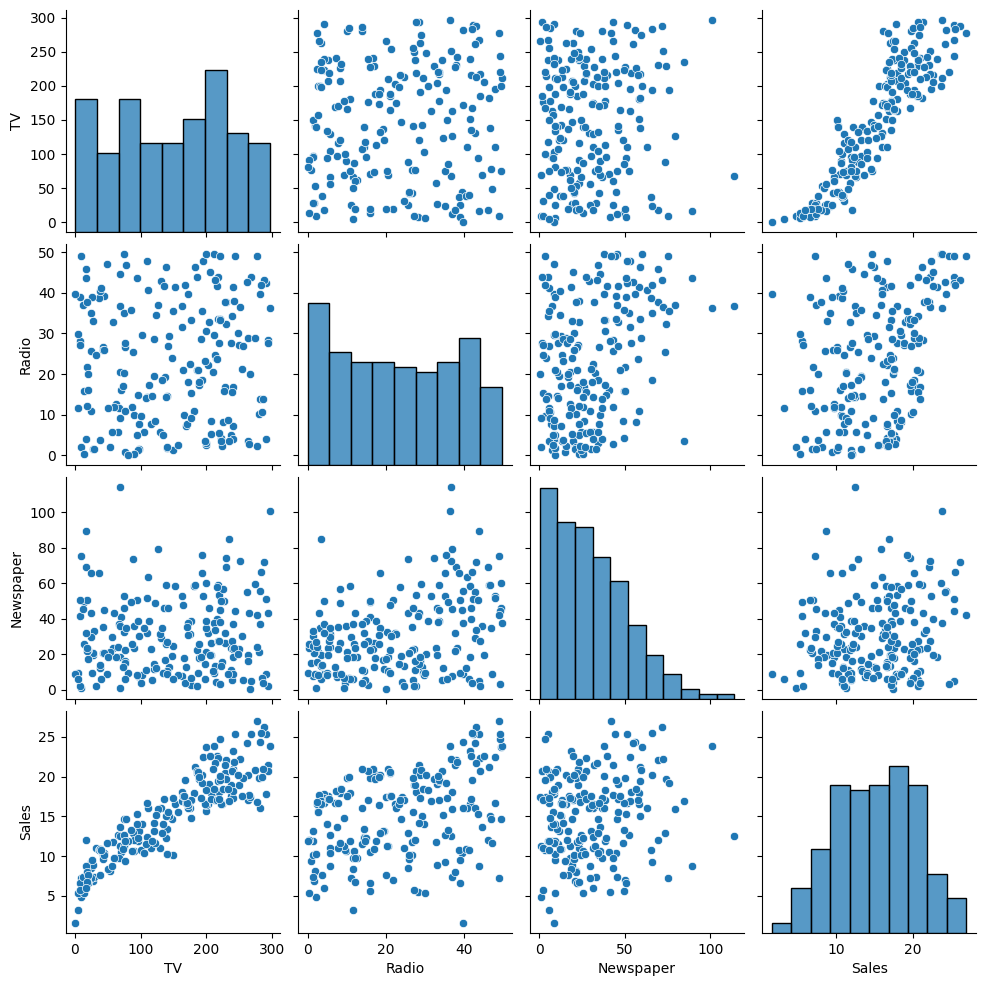

In [10]:
import seaborn as sns
sns.pairplot(df)
sns,pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='scatter')

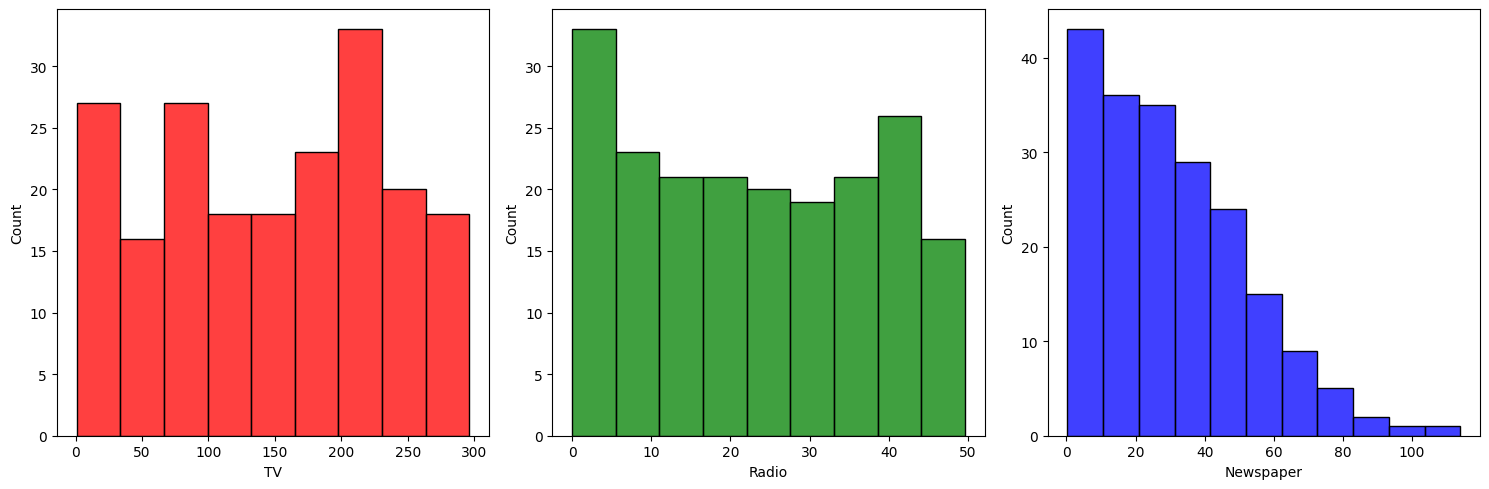

In [12]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['TV'],color='red',ax=axs[0])
sns.histplot(df['Radio'],color='green',ax=axs[1])
sns.histplot(df['Newspaper'],color='blue',ax=axs[2])
plt.tight_layout()

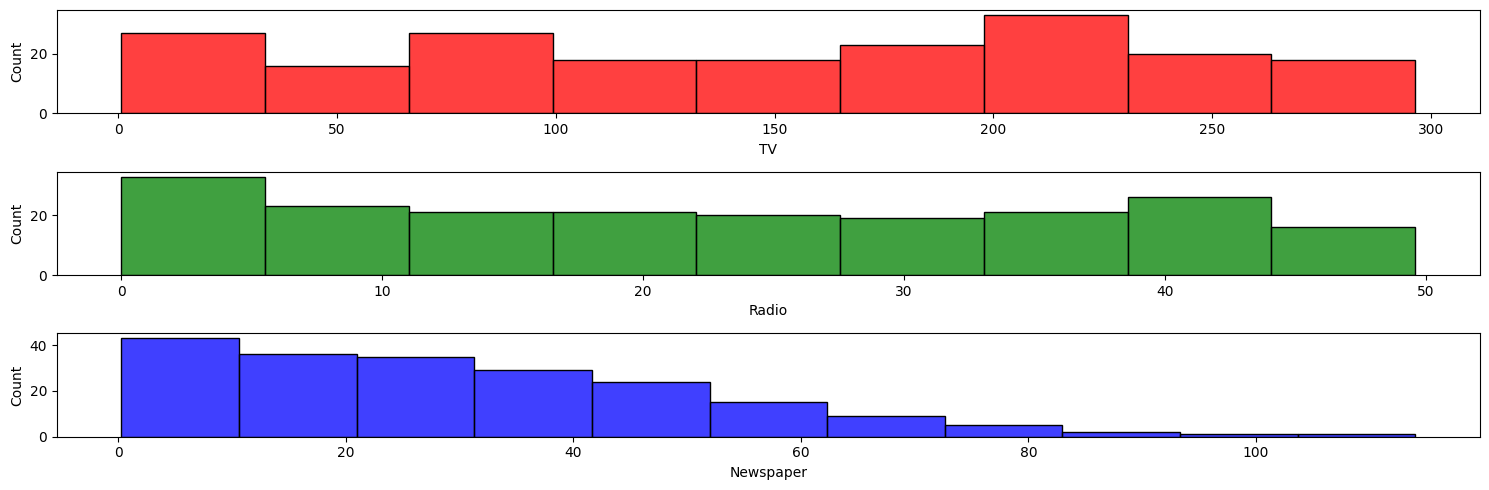

In [13]:
fig,axs=plt.subplots(3,figsize=(15,5))
sns.histplot(df['TV'],color='red',ax=axs[0])
sns.histplot(df['Radio'],color='green',ax=axs[1])
sns.histplot(df['Newspaper'],color='blue',ax=axs[2])
plt.tight_layout()

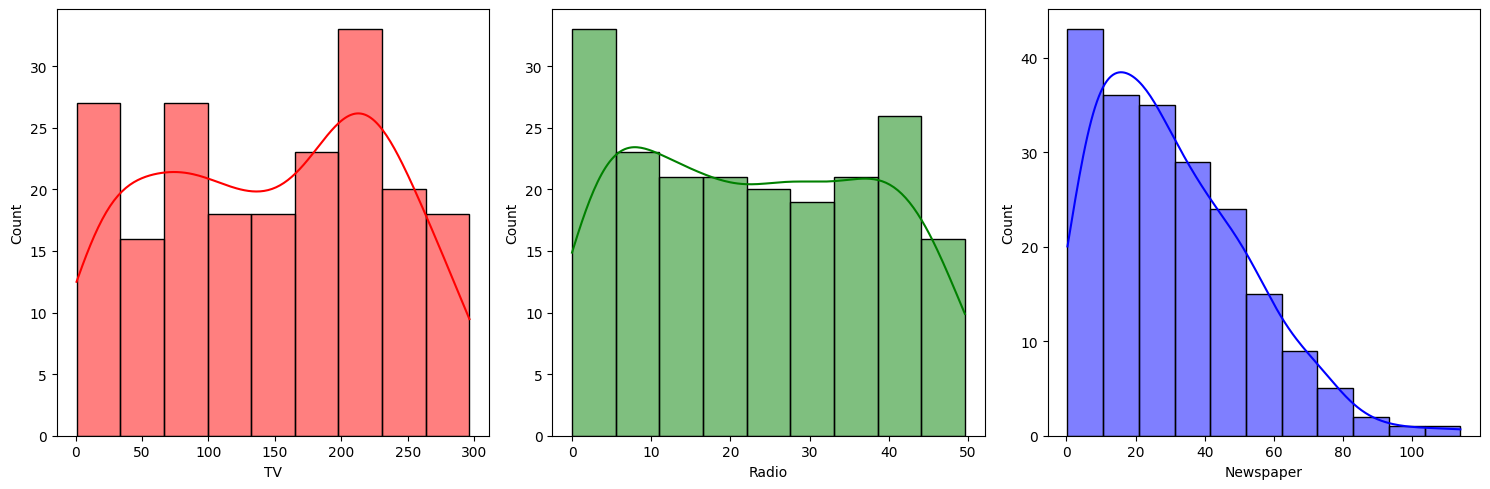

In [14]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['TV'],color='red',kde=True,ax=axs[0])
sns.histplot(df['Radio'],color='green',kde=True,ax=axs[1])
sns.histplot(df['Newspaper'],color='blue',kde=True,ax=axs[2])
plt.tight_layout()

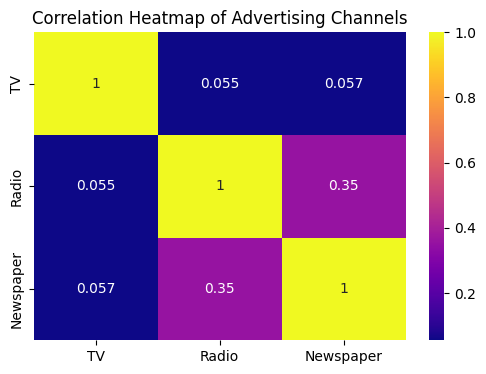

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df[['TV', 'Radio', 'Newspaper']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='plasma')
plt.title("Correlation Heatmap of Advertising Channels")
plt.show()


Fitting the Dataset with Appropriate Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
x_test=df[['TV','Radio','Newspaper']]
y_test=df['Sales']

In [20]:
import statsmodels.api as sns

In [22]:
import statsmodels.api as sm
x1_test=sm.add_constant(x_test)
reg=sm.OLS(y_test,x1_test).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           8.13e-99
Time:                        14:49:22   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x_test,y_test,test_size=0.2,random_state=42)

In [24]:
len(x_train),len(x_test),len(y_train),len(y_test)

(160, 40, 160, 40)

In [25]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
y_predict=lr.predict(x_test)
y_predict

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [27]:
y_test

,Sales
95,16.9
15,22.4
30,21.4
158,7.3
128,24.7
115,12.6
69,22.3
170,8.4
174,16.5
45,16.1


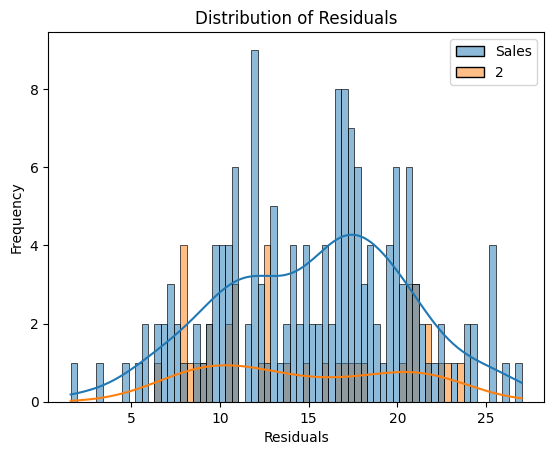

In [33]:
# Calculate residuals
residual = y_test,y_train,y_predict

# Plot residuals distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(residual, bins=70, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()



In [34]:
from google.colab import auth
auth.authenticate_user()
!git config --global user.name "kruthika8"
!git config --global user.email "kruthikakruthi865@gmail.com"
!git clone https://github.com/kruthika8/Codsoft.git

Cloning into 'Codsoft'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 490.64 KiB | 3.29 MiB/s, done.
Resolving deltas: 100% (2/2), done.
